# UMAP Explorer

This notebook acts as an exmaple of a UMAP exploration work flow

- Load data (this example uses a csv file)
- Generate data columns
- Embed the UMAP and plot the new xy-coordinates
- Generate clusters using the default Leiden algo
- Plot the UMAP again this time coloring on the clusters
- Generate a xgboost regression model selecting 2 clusters


In [1]:
import explorer as ue

import numpy as np
import pandas as pd

/opt/homebrew/Caskroom/miniforge/base/envs/python/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
explore = ue.UE()

In [3]:
explore.load_data('../image_umap.csv',filetype='csv')

In [4]:
explore.get_data_columns(print_cols=False, extra=["x", "y","Conc uM"])

In [5]:
explore.embed()

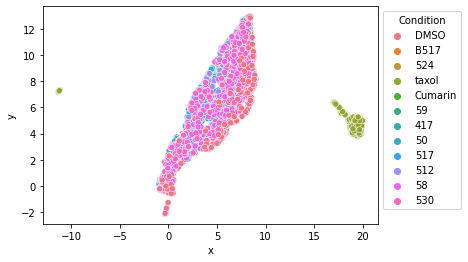

In [6]:
explore.plot(color_on='Condition')

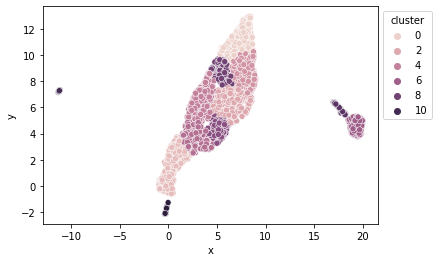

In [7]:
explore.cluster()
explore.plot(color_on='cluster')

In [8]:
explore.gen_model(8, 2)

/Users/ben/Work/UMAP-Explorer/explorer/umap_explorer.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['label'] = 0.0


Model R2 Score: 0.87
Model MSE: 0.03
